## This is an exemple of use of the features present in the keys204ADriver.
This is a driver enabling easy control of a Keysight S series 204A from a python script, trough the rj45 porte of the device. 

In [1]:
import pyvisa as visa
import numpy as np
import matplotlib.pyplot as plt
import lab.keys204ADriver as scope_driver
scope_driver?

Type:        module
String form: <module 'lab.keys204ADriver' from 'C:\\Users\\FPGA designer\\Documents\\GitHub\\controle_manip\\lab\\keys204ADriver.py'>
File:        c:\users\fpga designer\documents\github\controle_manip\lab\keys204adriver.py
Docstring:  
# this is a library enabling remote control of a  Keysight S series 204A with a rj45 port from a pc.
#
# develloped @ C2N, palaiseau.
#
# Need a pyvisa backend to work.
#
#================================================================================================


In [2]:
visa.ResourceManager('@ivi').list_resources('?*')

('USB0::0x2A8D::0x904F::MY55510136::INSTR', 'ASRL1::INSTR', 'ASRL3::INSTR')

## Scope initialisation

In [3]:
scope_driver.Keys204A?
A = scope_driver.Keys204A('USB0::0x2A8D::0x904F::MY55510136::INSTR')

Connected Device : KEYSIGHT TECHNOLOGIES,MSOS204A,MY55510136,05.70.00714



Init signature: scope_driver.Keys204A(adress, backend='@ivi')
Docstring:     
class that manages the scope.

...

Attributes
----------
adress : str
    the port adress of the scope.

ressource_manager : comtypes.POINTER(IResourceManager)
    the ressource manager for the scope.

inst : comtypes.POINTER(IFormattedIO488)
    comtypes instance.

Methods
----------
do_command(command) : 
    sends a command to the scope.
    
do_query_string(query) :
    queries the scope and return the answer as a string.
    
do_query_ieee_block(query) :
    enables querying easily the scope for binary data.
    
do_query_number(query) :
    queries the scope for a number.
    
set_trigger(trigger_channel,trigger_sweep,trigger_level) :
    set the trigger parameters.
    
time_base(time_scale, time_ref) :
    set the time scale on the scope display.
    
set_channels(channels, displays, y_scales, offsets, probes, input_couplings) :
    set the channels display and probes.

retrieve_waveform(channel) :
 

## Trigger setting

In [4]:
scope_driver.Keys204A.set_trigger?
A.set_trigger(2,"AUTO",0.2)

Signature:
scope_driver.Keys204A.set_trigger(
    self,
    trigger_channel=1,
    trigger_sweep=None,
    trigger_level=None,
    print_output=0,
)
Docstring:
set the scope's trigger mode, level and channel.

Parameters
----------
trigger_channel : int, default = 1
    the channel on wich the trigger is set.
    
trigger_sweep : str, default = None
    The type of trigger. "TRIGGERED" or "AUTO". By default no changes are applied.

trigger_level : float, default = None
    the level for the trigger. By default no changes are applied.

print_output : boolean, default = 0
    wether to prit or not the new setting to verify all is good.
File:      c:\users\fpga designer\documents\github\controle_manip\lab\keys204adriver.py
Type:      function


## Time base setting

In [5]:
scope_driver.Keys204A.time_base?
A.time_base(1e-4,10)

Signature: scope_driver.Keys204A.time_base(self, time_scale, time_ref, print_output=0)
Docstring:
 set the scope's time base scale and offset.
 
Parameters
 ----------
 time_scale : float
     time per division in seconds. ranges from 5e-12 to 20.
 
 time_ref : int
     percentage of the screen (starting from the left) where the time offset is put. 0 = flush left, 50 = middle , 100 = flush right.
 
 print_output : boolean, default = 0
     wether to prit or not the new setting to verify all is good.
 
File:      c:\users\fpga designer\documents\github\controle_manip\lab\keys204adriver.py
Type:      function


## Channel view setting

### remark : if a probe is set in and is already giving the scaling to the scope, entering a probe ratio will cause an error to occur

In [6]:
scope_driver.Keys204A.set_channels?
A.set_channels([1,2,3,4],[1,1,0,0],[1,1,1,1],input_couplings=['DC50','DC50','DC','DC'])

Signature:
scope_driver.Keys204A.set_channels(
    self,
    channels=[1, 2, 3, 4],
    displays=[1, 1, 1, 1],
    y_scales=[1, 1, 1, 1],
    offsets=[0.0, 0.0, 0.0, 0.0],
    probes=[None, None, None, None],
    input_couplings=['DC', 'DC', 'DC', 'DC'],
    print_output=0,
)
Docstring:
set the scope's time base scale and offset.

Parameters
----------
channels : int list, default = [1,2,3,4]
    channels to tweak. 1 to 4.

displays : boolean list, default = [1,1,1,1]
    displaying state of the specified channels.

y_scales : int list, default = [1,1,1,1]
    voltage per division for the specifieds channels.

offsets : float list, default = [0.,0.,0.,0.]
    offset for the specified channel.

probes : float list, default = [None,None,None,None]
    probes ratio (X:1) for the specified channels : ranges from 1e-4 to 1e3. If probes attached are automaticaly providing the probe data to the scope, use None.

input_coupling : str list, default = ['DC','DC','DC','DC']
    choose from the fo

## Waveform retrieving and saving

Signature: scope_driver.Keys204A.retrieve_waveform(self, channel, nb_points)
Docstring:
retrieve y and x of the waveform on the specified channel (THEY MUST BE DISPLAYED).

Parameters
----------
channel : int
    number of channel to retrieve the waveform from.
nb_points : int
    number of data points to be acquired.
Return
----------
x, y : numpy arrays
File:      c:\users\fpga designer\documents\github\controle_manip\lab\keys204adriver.py
Type:      function


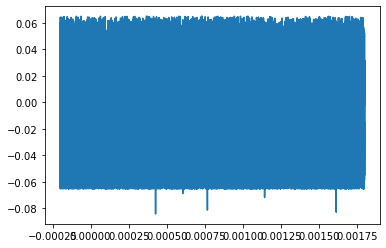

In [7]:
scope_driver.Keys204A.retrieve_waveform?
x,y = A.retrieve_waveform(1,1000000)
plt.plot(x,y)

Signature:
scope_driver.Keys204A.save_waveform(
    self,
    channel,
    nb_points,
    name='waveform',
    path='',
)
Docstring:
retrieve y and x of the waveform on the specified channel (THEY MUST BE DISPLAYED) and store thame with the specified name within the specified folder.
The data is stored under numpy array format with x being data[:,0] and y being data[:,1].

Parameters
----------
channel : int
    number of channel to retrieve the waveform from.

nb_points : int
    number of data point to be acquired.

name : str, default = 'waveform'
    name under wich data will be stored.
    
path : str, default = ''
    path to where to store the data.
File:      c:\users\fpga designer\documents\github\controle_manip\lab\keys204adriver.py
Type:      function


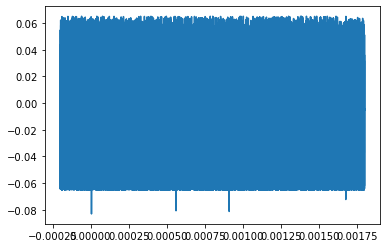

In [8]:
scope_driver.Keys204A.save_waveform?
A.save_waveform(1,1000000)
data = np.load('waveform.npy')
plt.plot(data[:,0],data[:,1])